<img src="mrc.png" alt="Description de l'image" width="1400" height="100">

## <span style="color: red;">Chilhood Tuberculosis Study</span>

### <span style="color: red;">Data Exploration and Descriptive Statistics</span>

#### <span style="color: red;">Load Packages</span>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches    
import seaborn as sns  
import geopandas as gpd
import missingno as msn   
import janitor
import re       
from dateutil import parser 

#### <span style="color: red;"> Load the dataset and initial overview</span>

In [110]:
# Load the dataset
df = pd.read_csv('cleaned_tb_dataset.csv')

# Display the first few rows of the dataset
display(df.head())

# Display the shape of the dataset
print(df.shape)

,patient_id,age,regist_date,gender,country,cough,productive,chest_pain,wheeze,fever_chills,...,bronchial_breathing,rhonchi,reduced_breath_sounds,specimen_result,gx_mtb_result,gx_rif_resistance,mgit_result,histology_result,hiv_serology,diagnosis
0,ben001,0.67,2020-05-05,2.0,Benin,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,3.0
1,ben003,14.00,2020-04-28,1.0,Benin,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,3.0,0.0,0.0,2.0,0.0,2.0,1.0,3.0
2,ben004,14.00,2020-04-30,1.0,Benin,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,3.0
3,ben005,2.42,2020-05-06,1.0,Benin,1.0,1.0,0.0,0.0,1.0,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0
4,ben0059,5.00,2021-03-18,2.0,Benin,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,2.0,3.0


(222, 45)


**The  dataset contains 222 rows, representing the number of observations, and  45 columns, representing the number of variables.**

#### <span style="color: red;"> Sample distribution by country</span>

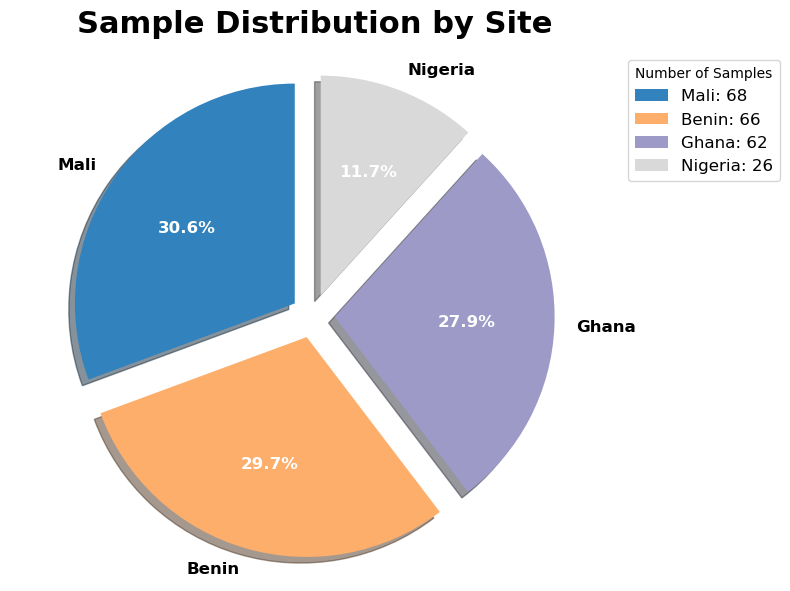

In [111]:
# Create a copy of the DataFrame and count the samples per site
sampe_dis = df.copy()
sample_counts = sampe_dis['country'].value_counts()

# Define colors for the pie chart
colors = plt.cm.tab20c(np.linspace(0, 1, len(sample_counts)))

# Create and style the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sample_counts,
    labels=sample_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True, 
    explode=[0.1] * len(sample_counts)
)

# Format the text elements
plt.setp(texts, size=12, weight='bold')
plt.setp(autotexts, size=12, weight='bold', color='white')

# Add title and legend
#plt.title('Population Distribution Across Sites', fontsize=22, weight='bold', y=1.02)
plt.legend(
    [f'{site}: {count}' for site, count in zip(sample_counts.index, sample_counts)],
    title='Number of Samples',
    loc='upper left',
    bbox_to_anchor=(1, 1), 
    fontsize=12
)

# Save and display the chart
plt.title('Sample Distribution by Site', fontsize=22, weight='bold', y=1.02)
plt.axis('equal')
plt.tight_layout()
plt.savefig('Sample_Distribution_by_Site.png', dpi=300)
plt.show()

**The samples are from four different countries in West Africa: Benin, Ghana, Mali, and Nigeria. The proportion of samples varies by country, with Nigeria representing the smallest percentage at 11.7%, while Mali showcases the largest proportion at 30.6%. This variation highlights the disparities in sample representation across these locations.**

#### <span style="color: red;"> Distribion of sample by gender </span>

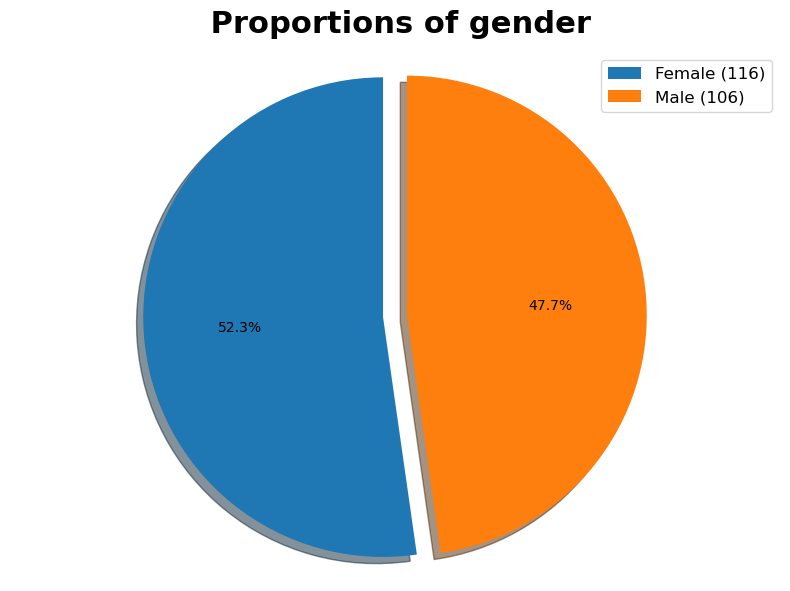

In [112]:
# Count the occurrences and proportions of each gender
gender_counts = df['gender'].value_counts()
proportions = df['gender'].value_counts(normalize=True) * 100

# Define labels and colors for the pie chart
labels = [f'Female ({gender_counts[2]})', f'Male ({gender_counts[1]})']
colors = ['#1f77b4', '#ff7f0e']

# Create and style the pie chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True, explode=(0.1, 0))
#plt.title('Proportions of Gender', fontsize=22, weight='bold', y=1.02)
plt.legend(labels, loc='upper right', fontsize=12)

# Save and display the chart
plt.title(' Proportions of gender', fontsize=22, weight='bold', y=1.02)
plt.axis('equal') 
plt.tight_layout()
plt.savefig('Gender_Proportions.png', dpi=300)
plt.show()

**The dataset contains 226 individuals, of which 116 are female, representing 52.3%, while 106 are male, accounting for 47.7%.**

#### <span style="color: red;"> Number of males and females by country </span>

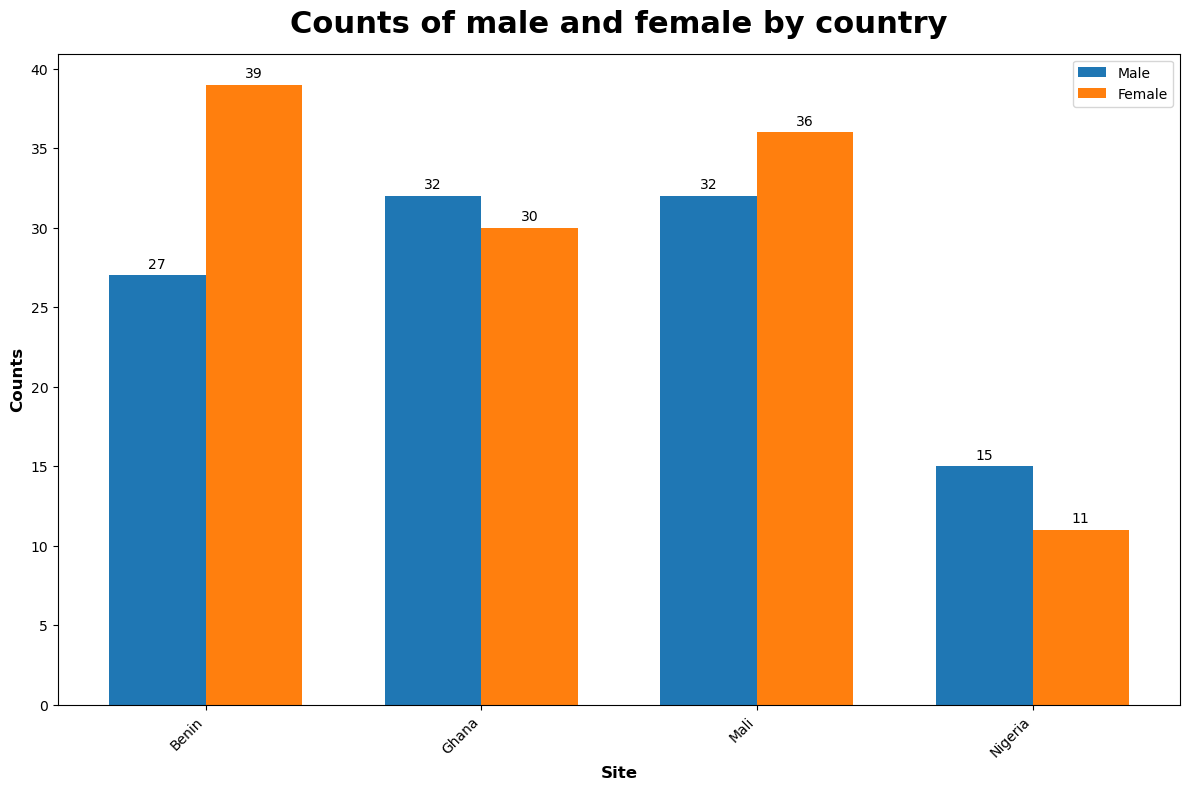

In [113]:
# Create a copy of the DataFrame and map gender codes to labels
df_cop = df.copy()
df_cop['gender'] = df_cop['gender'].map({1: 'Male', 2: 'Female'})

# Group data by 'SITE' and 'GENDER', then reshape to a wide format
gender_counts = df_cop.groupby(['country', 'gender']).size().unstack(fill_value=0)

# Prepare data for the bar chart
labels = gender_counts.index.tolist()  # Site labels
men_means = gender_counts['Male'].values  # Male counts per site
women_means = gender_counts['Female'].values  # Female counts per site
x = np.arange(len(labels))  # X-axis positions
width = 0.35  # Bar width

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bar colors
colors = ['#1f77b4', '#ff7f0e']

# Plot bars for Male and Female counts
rects1 = ax.bar(x - width/2, men_means, width, color=colors[0], label='Male')
rects2 = ax.bar(x + width/2, women_means, width, color=colors[1], label='Female')

# Customize axes and title
ax.set_xlabel('Site', fontsize=12, weight='bold')
ax.set_ylabel('Counts', fontsize=12, weight='bold')
#ax.set_title('Counts of Male and Female by Site', fontsize=22, weight='bold', y=1.02)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Add data labels to bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, color='black')

autolabel(rects1)
autolabel(rects2)

# Finalize layout
plt.title('Counts of male and female by country', fontsize=22, weight='bold', y=1.02)
fig.tight_layout()
plt.grid(False)  # Disable gridlines
plt.savefig('Counts-of-male-and-female-by-country.png', dpi=300)  # Save the plot
plt.show()  # Display the plot


**In the dataset, the number of females is greater than the number of males for Benin, Ghana and Mali while the number of males is greater than the number of females for Nigeria.**

#### <span style="color: red;"> Pyramid population </span>

Birth - 27 d: term neonatal

28 d - 12 mo: infancy

13 mo - 2 y: toddler

3 - 5 y: early chilhood

6 - 11 y: middle chilhood

12 - 18: early adolescence

 19 - 21: late adolescence

Age stages defined according to NICHD pediatric terminology

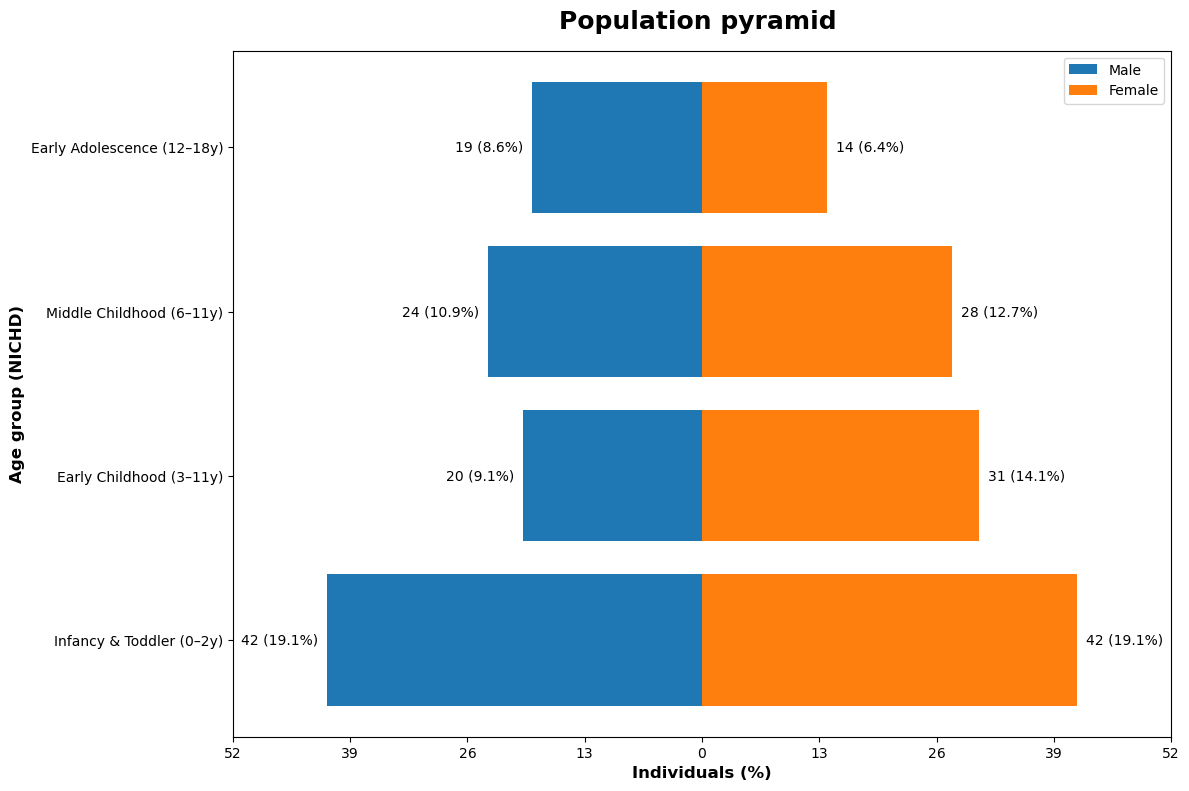

In [114]:
# Copy the df
df_copy = df.copy()

# Define NICHD-based age groups 
bins = [0, 2, 5, 11, 18]
labels = ['Infancy & Toddler (0–2y)', 'Early Childhood (3–11y)', 'Middle Childhood (6–11y)', 'Early Adolescence (12–18y)']

# Create AgeGroup column
df_copy['AgeGroup'] = pd.cut(df_copy['age'], bins=bins, labels=labels, right=True)

# Replace gender codes for clarity
df_copy['gender'] = df_copy['gender'].replace({1: 'Male', 2: 'Female'})

# Create the age-gender distribution table
age_gender_dist = df_copy.groupby(['AgeGroup', 'gender'], observed=False)['gender'].count().unstack().fillna(0)

# Separate male and female values for pyramid (negate male values for plotting)
male = -age_gender_dist['Male']
female = age_gender_dist['Female']

# Reorder index to ensure proper vertical order in plot
age_gender_dist = age_gender_dist.reindex(labels)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(age_gender_dist.index, male, color='#1f77b4', label='Male')
ax.barh(age_gender_dist.index, female, color='#ff7f0e', label='Female')

# Add text labels for percentages
total = male.abs().sum() + female.sum()
for i in range(len(labels)):
    ax.text(male.iloc[i] - 1, i, f'{-male.iloc[i]:.0f} ({(-male.iloc[i] / total) * 100:.1f}%)',
            va='center', ha='right', fontsize=10)
    ax.text(female.iloc[i] + 1, i, f'{female.iloc[i]:.0f} ({(female.iloc[i] / total) * 100:.1f}%)',
            va='center', ha='left', fontsize=10)

# Set axis labels and formatting
ax.set_xlabel('Individuals (%)', fontsize=12, weight='bold')
ax.set_ylabel('Age group (NICHD)', fontsize=12, weight='bold')
ax.set_title('Population pyramid ', fontsize=18, weight='bold', y=1.02)

# Set x-tick formatting
max_val = max(-male.min(), female.max())
max_range = 1.25 * max_val
x_ticks = np.linspace(-max_range, max_range, 9)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{abs(int(x))}' for x in x_ticks])

# Final formatting
ax.set_xlim(-max_range, max_range)
ax.grid(False)
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Population_Pyramid_NICHD.png', dpi=300)
plt.show()

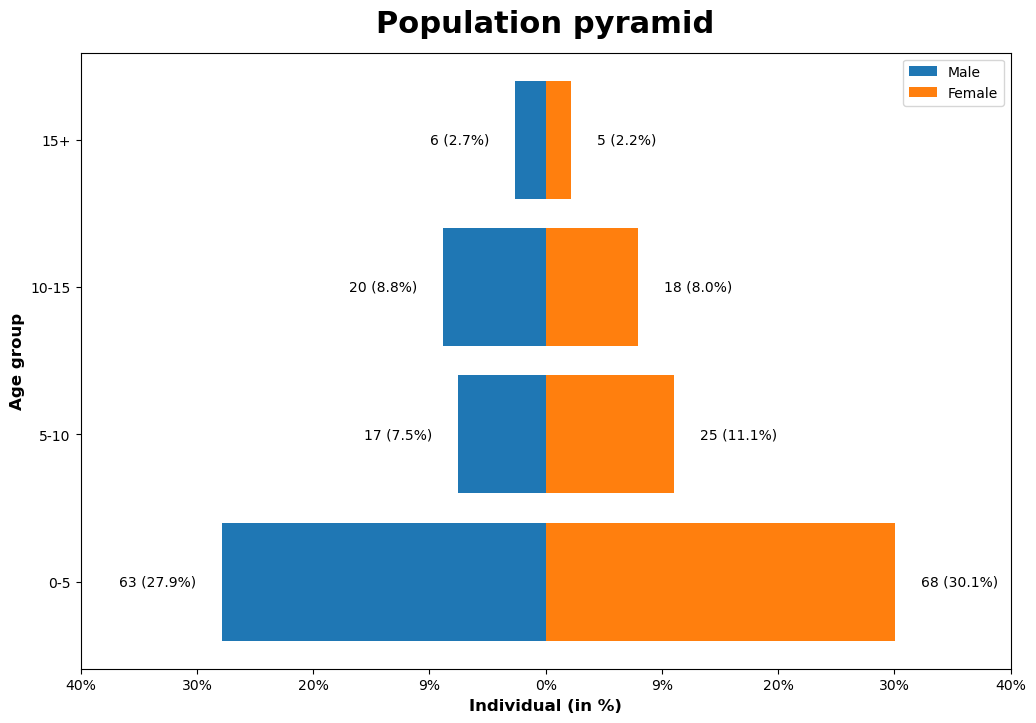

In [115]:
# Define bins and labels
bins = [0, 5, 10, 15, float('inf')]
labels = ['0-5', '5-10', '10-15', '15+']

# Create a copy of the DataFrame and add the AgeGroup column
df_copi = df.copy()
df_copi['AgeGroup'] = pd.cut(df_copi['age'], bins=bins, labels=labels, right=False)
df_copi['gender'] = df_copi['gender'].replace({1: 'Male', 2: 'Female'})

# Group by AgeGroup and Gender with observed parameter
age_gender_distribution = df_copi.groupby(['AgeGroup', 'gender'], observed=False)['gender'].count().unstack().fillna(0)

# Separate male and female counts
male = -age_gender_distribution['Male']
female = age_gender_distribution['Female']

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(age_gender_distribution.index, male, color='#1f77b4', label='Male')
ax.barh(age_gender_distribution.index, female, color='#ff7f0e', label='Female')

# Adding text labels for percentages
total_individuals = 226  # Update this if needed
for i in range(len(labels)):
    ax.text(male.iloc[i] - 5, i, f'{-male.iloc[i]:,.0f} ({(-male.iloc[i] / total_individuals) * 100:.1f}%)', 
            va='center', ha='right', fontsize=10)
    ax.text(female.iloc[i] + 5, i, f'{female.iloc[i]:,.0f} ({(female.iloc[i] / total_individuals) * 100:.1f}%)', 
            va='center', ha='left', fontsize=10)

# Set axis labels and title
ax.set_xlabel('Individual (in %)', fontsize=12, weight='bold')
ax.set_ylabel('Age group', fontsize=12, weight='bold')
#ax.set_title('Population Pyramid', fontsize=22, weight='bold', y = 1.02)

# Set x-ticks and labels for percentage
max_percentage = 0.4 * total_individuals 
x_ticks = np.linspace(-max_percentage, max_percentage, 9)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{int(abs(x) / total_individuals * 100)}%' for x in x_ticks])

# Configure x-axis limits and legend
ax.set_xlim(-max_percentage, max_percentage)
ax.grid(False)
ax.legend(loc='upper right')

# Save and show plot
plt.title('Population pyramid', fontsize=22, weight='bold', y = 1.02)
plt.savefig('Individual-Pyramid.png', dpi=300)
plt.show()

**According to the population pyramid, there is a higher concentration of individuals in the younger age groups. It is also noteworthy that the proportion of females is greater than that of males in age groupes 0-5 and 5-10 but the proportion of males is greater than the proportion of females in 10-15 and 15+ group age.**

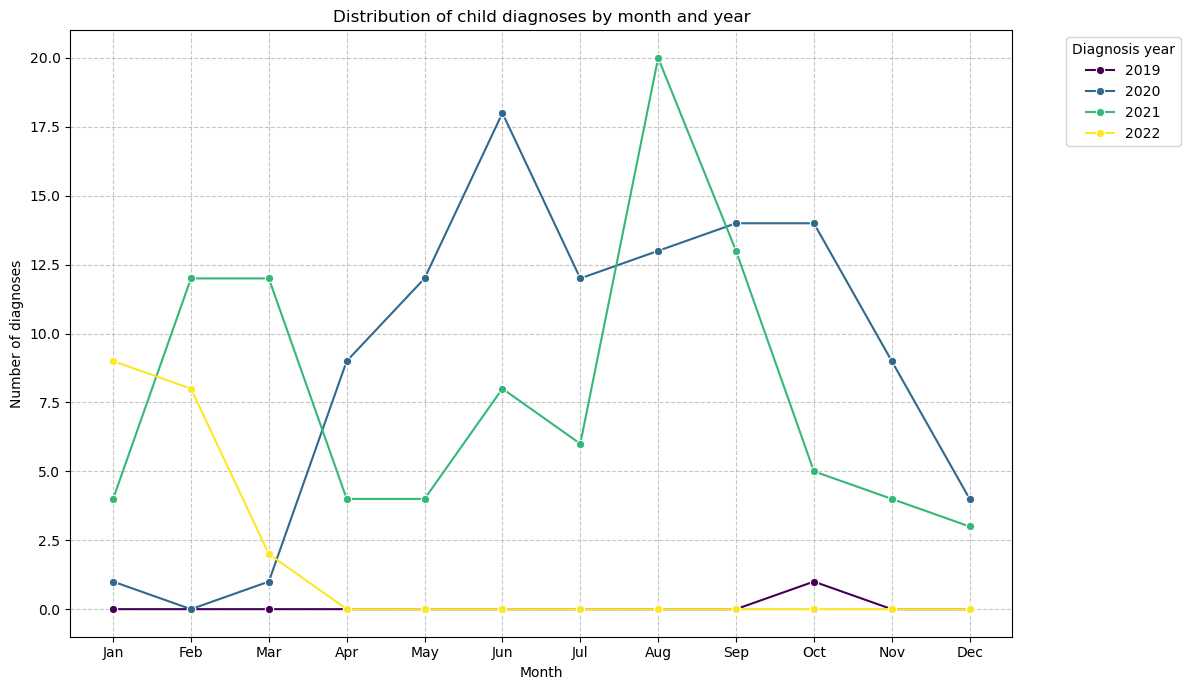

In [116]:
# Convert 'regist_date' to datetime format. 
df1 = df.copy()
df1['regist_date'] = pd.to_datetime(df1['regist_date'])

# Extract year and month (1-12) from the 'regist_date'.
df1['year'] = df1['regist_date'].dt.year
df1['month'] = df1['regist_date'].dt.month

# Count diagnoses per year and month.
diagnosis_counts = df1.groupby(['year', 'month']).size().reset_index(name='count')

# filling missing counts with 0.
all_years = diagnosis_counts['year'].unique()
all_months = range(1, 13)
all_dates = pd.MultiIndex.from_product([all_years, all_months], names=['year', 'month'])
full_diagnosis_counts = diagnosis_counts.set_index(['year', 'month']).reindex(all_dates, fill_value=0).reset_index()

# Plot figure size.
plt.figure(figsize=(12, 7))

# Create the line.
# 'hue='year'' draws a separate line for each year, allowing easy comparison.
sns.lineplot(
    data=full_diagnosis_counts,
    x='month',
    y='count',
    hue='year',
    marker='o',
    palette='viridis'
)

# Customize plot titles and labels.
plt.title('Distribution of child diagnoses by month and year')
plt.xlabel('Month')
plt.ylabel('Number of diagnoses')

# Set x-axis tick labels to month names for better readability.
month_labels = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]
plt.xticks(ticks=range(1, 13), labels=month_labels)

# Add a grid, position the legend, and ensure a tight layout.
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Diagnosis year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_9361/2288769856.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


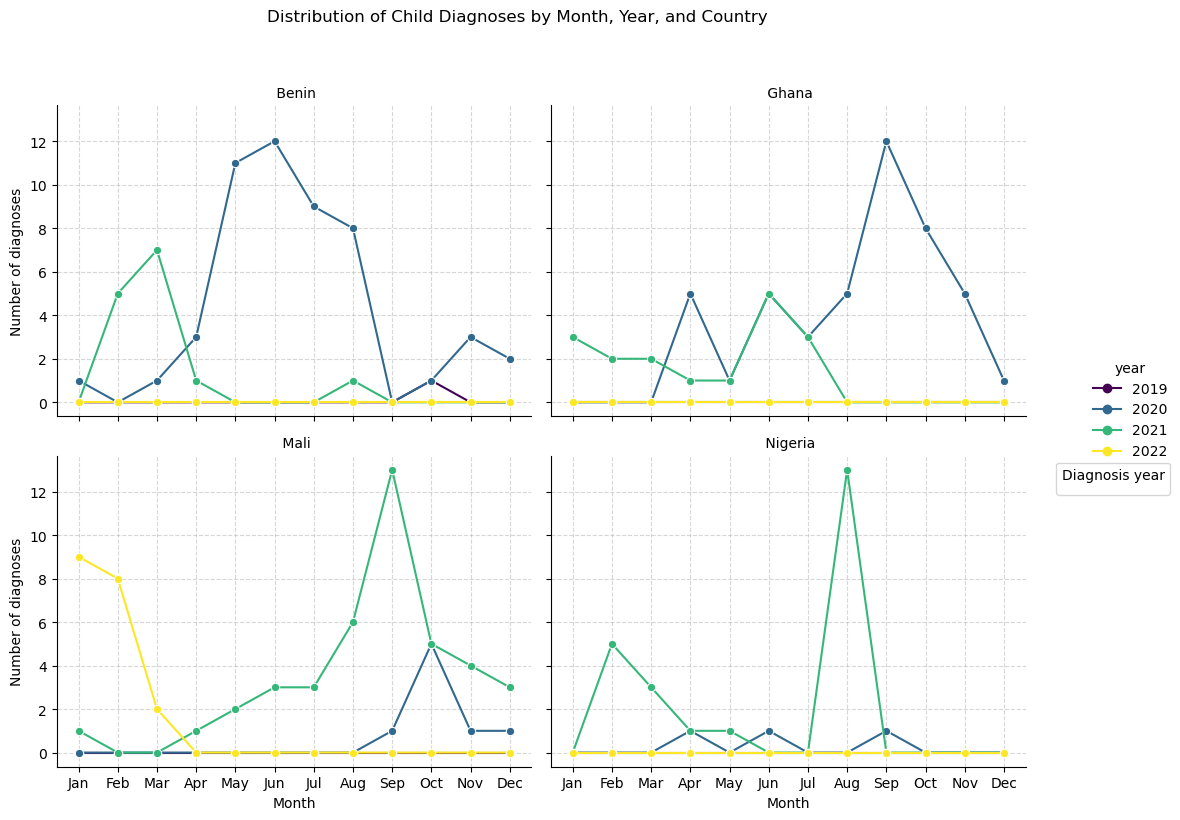

In [117]:

# Copy of the DataFrame
df1 = df.copy()

# Convert 'regist_date' to datetime format.
df1['regist_date'] = pd.to_datetime(df1['regist_date'])

# Extract year and month from 'regist_date.
df1['year'] = df1['regist_date'].dt.year
df1['month'] = df1['regist_date'].dt.month

# Aggregate data: Count diagnoses per year, month, and country.
# We're grouping df1 by 'year', 'month', and 'country'.
diagnosis_counts = df1.groupby(['year', 'month', 'country']).size().reset_index(name='count')

# Fill missing counts with 0.
all_years = diagnosis_counts['year'].unique()
all_months = range(1, 13)
all_countries = df1['country'].unique() 

# Create a MultiIndex for all possible year-month-country combinations.
all_combinations = pd.MultiIndex.from_product(
    [all_years, all_months, all_countries],
    names=['year', 'month', 'country']
)
full_diagnosis_counts = diagnosis_counts.set_index(['year', 'month', 'country']).reindex(all_combinations, fill_value=0).reset_index()

# Sort the data for proper plotting order (optional but good practice).
full_diagnosis_counts = full_diagnosis_counts.sort_values(by=['year', 'country', 'month'])


# Set up the plot. 'col' creates a column of plots for each country.
g = sns.relplot(
    data=full_diagnosis_counts,
    x='month',
    y='count',
    col='country',       # Creates a separate subplot for each country
    hue='year',          # Lines within each subplot are colored by year
    kind='line',         # Specify line plot
    marker='o',          # Add markers for each month
    palette='viridis',   # Color palette for years
    col_wrap=2,          # Arrange plots in 2 columns for better layout
    height=4, aspect=1.2 # Adjust subplot size
)

# Customize subplot titles and labels.
g.set_titles(" {col_name}") # Title for each individual country subplot
g.set_xlabels('Month')
g.set_ylabels('Number of diagnoses')

# Set x-axis tick labels to month names for better readability across all subplots.
month_labels = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]
for ax in g.axes.flat:
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_labels)
    ax.grid(True, linestyle='--', alpha=0.5) # Add a grid to each subplot

# Add a main title for the entire figure and adjust layout.
plt.suptitle('Distribution of Child Diagnoses by Month, Year, and Country', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.legend(title='Diagnosis year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [118]:
df.columns

Index(['patient_id', 'age', 'regist_date', 'gender', 'country', 'cough',
       'productive', 'chest_pain', 'wheeze', 'fever_chills',
       'weight_loss_or_no_gain', 'difficulty_breathing', 'night_sweats',
       'side_pain', 'malaise_fatigue', 'loss_appetite', 'haemoptysis',
       'vomiting', 'previous_tb', 'pallor', 'splenomegaly', 'jaundice',
       'hepatomegaly', 'wasting', 'dyspnoea', 'lethargy',
       'abd_distension_mass', 'neck_lymph', 'temperature', 'weight', 'height',
       'respiratory_rate', 'subscostal_rec', 'dullness', 'crepitation',
       'bronchial_breathing', 'rhonchi', 'reduced_breath_sounds',
       'specimen_result', 'gx_mtb_result', 'gx_rif_resistance', 'mgit_result',
       'histology_result', 'hiv_serology', 'diagnosis'],
      dtype='object')

#### <span style="color: red;"> Number and proportion in categorical variables </span>

In [119]:
# Copy original df
df1 = df.copy()

# Define mappings
gender_map = {1: 'Female', 2: 'Male'}
diagnosis_map = {1: 'Confirmed TB', 2: 'Unconfirmed TB', 3: 'Unlikely TB'}
three_cat_map = {0: 'No', 1: 'Yes', 2: "Don't know"}
lung_map = {0: 'No', 1: 'Left', 2: 'Right', 3: 'Both'}

# Define variable groups
gender_var = ['gender']
diagnosis_var = ['diagnosis']
lung_vars = ['dullness', 'crepitation', 'bronchial_breathing', 'rhonchi', 'reduced_breath_sounds']
three_cat_vars = [
    'cough', 'productive', 'chest_pain', 'wheeze', 'fever_chills', 'weight_loss_or_no_gain',
    'difficulty_breathing', 'night_sweats', 'side_pain', 'malaise_fatigue', 'loss_appetite',
    'haemoptysis', 'vomiting', 'previous_tb', 'pallor', 'splenomegaly', 'jaundice',
    'hepatomegaly', 'wasting', 'dyspnoea', 'lethargy', 'abd_distension_mass', 'neck_lymph',
    'subscostal_rec'
]

# Apply mappings
df1['gender'] = df1['gender'].map(gender_map)
df1['diagnosis'] = df1['diagnosis'].map(diagnosis_map)
for var in three_cat_vars:
    df1[var] = df1[var].map(three_cat_map)
for var in lung_vars:
    df1[var] = df1[var].map(lung_map)

# Function to generate summary tables
def generate_summary_flat(df, variables, custom_order=None):
    summary = []
    for var in variables:
        counts = df[var].value_counts(dropna=False)
        total = counts.sum()

        # Apply custom order if provided
        if custom_order and var in custom_order:
            categories = custom_order[var]
        else:
            categories = sorted(counts.index)  # fallback to sorted

        row = {'variable': var}
        for cat in categories:
            count = counts.get(cat, 0)
            row[str(cat)] = f"{count} ({count / total * 100:.2f}%)"
        summary.append(row)

    return pd.DataFrame(summary)

custom_category_order = {
    'gender': ['Female', 'Male'],
    'diagnosis': ['Confirmed TB', 'Unconfirmed TB', 'Unlikely TB'],
    # Lung vars: No < Left < Right < Both
    **{var: ['No', 'Left', 'Right', 'Both'] for var in lung_vars},
    # 3-cat vars: No < Yes < Don't know
    **{var: ['No', 'Yes', "Don't know"] for var in three_cat_vars}
}

# Create grouped tables
table_gender = generate_summary_flat(df1, gender_var, custom_category_order)
table_diagnosis = generate_summary_flat(df1, diagnosis_var, custom_category_order)
table_lung = generate_summary_flat(df1, lung_vars, custom_category_order)
table_three_cat = generate_summary_flat(df1, three_cat_vars, custom_category_order)

In [120]:
print("Gender Variable:")
display(table_gender)

Gender Variable:


,variable,Female,Male
0,gender,106 (47.75%),116 (52.25%)


In [121]:
print("Diagnosis Variable:")
display(table_diagnosis)

Diagnosis Variable:


,variable,Confirmed TB,Unconfirmed TB,Unlikely TB
0,diagnosis,35 (15.77%),48 (21.62%),139 (62.61%)


In [122]:
print("Lung Examination Variables:")
display(table_lung)

Lung Examination Variables:


,variable,No,Left,Right,Both
0,dullness,186 (83.78%),10 (4.50%),7 (3.15%),19 (8.56%)
1,crepitation,116 (52.25%),17 (7.66%),18 (8.11%),71 (31.98%)
2,bronchial_breathing,204 (91.89%),7 (3.15%),2 (0.90%),9 (4.05%)
3,rhonchi,199 (89.64%),7 (3.15%),2 (0.90%),14 (6.31%)
4,reduced_breath_sounds,106 (47.75%),25 (11.26%),22 (9.91%),69 (31.08%)


In [123]:

print("Other 3-category Clinical Variables:")
display(table_three_cat)

Other 3-category Clinical Variables:


,variable,No,Yes,Don't know
0,cough,114 (51.35%),50 (22.52%),58 (26.13%)
1,productive,135 (60.81%),80 (36.04%),7 (3.15%)
2,chest_pain,153 (68.92%),46 (20.72%),23 (10.36%)
3,wheeze,200 (90.09%),15 (6.76%),7 (3.15%)
4,fever_chills,52 (23.42%),168 (75.68%),2 (0.90%)
5,weight_loss_or_no_gain,51 (22.97%),163 (73.42%),8 (3.60%)
6,difficulty_breathing,79 (35.59%),141 (63.51%),2 (0.90%)
7,night_sweats,166 (74.77%),48 (21.62%),8 (3.60%)
8,side_pain,180 (81.08%),19 (8.56%),23 (10.36%)
9,malaise_fatigue,86 (38.74%),124 (55.86%),12 (5.41%)


#### <span style="color: red;">West Africa Pre-TB Sample Map</span>


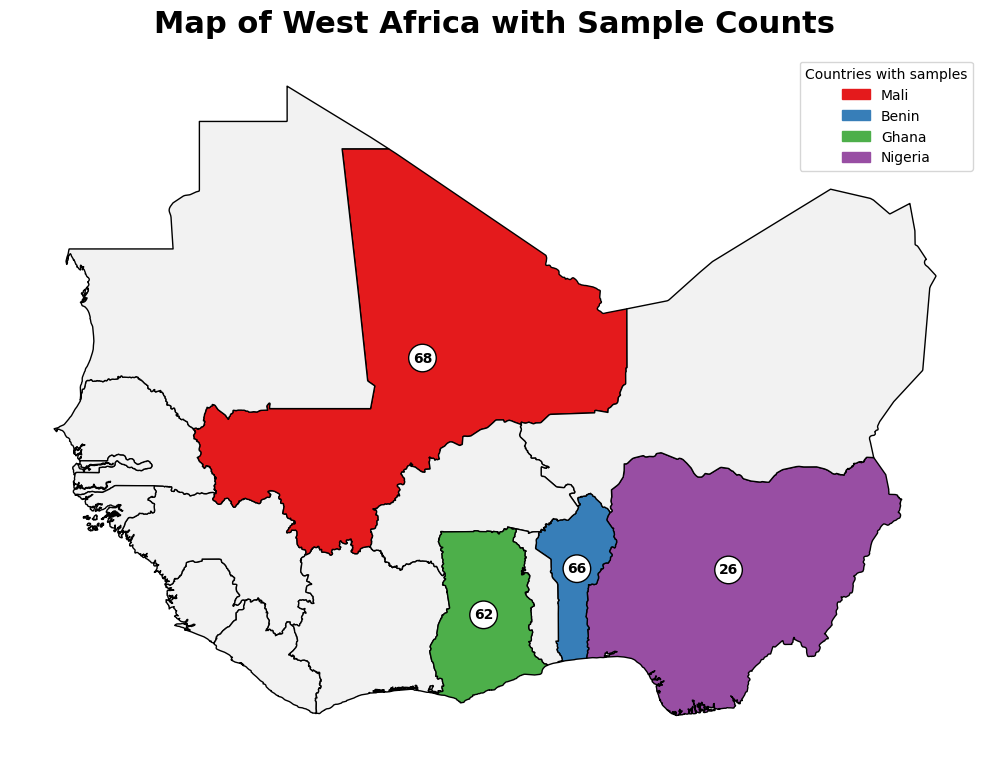

In [124]:
# Load world map
world = gpd.read_file("ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

# West African countries
west_africa = [
    "Benin", "Burkina Faso", "Cape Verde", "Côte d'Ivoire", "Gambia",
    "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania",
    "Niger", "Nigeria", "Senegal", "Sierra Leone", "Togo"
]
wa_map = world[world["NAME"].isin(west_africa)]

# Sample data
data = {
    "country": ["Mali", "Benin", "Ghana", "Nigeria"],
    "samples": [68, 66, 62, 26]
}
df_samples = pd.DataFrame(data)

# === 4. Merge data ===
wa_map = wa_map.merge(df_samples, how="left", left_on="NAME", right_on="country")

# Assign colors to each country with sample data
color_map = {
    "Mali": "#e41a1c",        
    "Benin": "#377eb8",       
    "Ghana": "#4daf4a",      
    "Nigeria": "#984ea3" 
}

# Color for non-concerned countries
non_concerned_color = "#f2f2f2" 

# Assign color for all countries
wa_map["color"] = wa_map["NAME"].map(color_map).fillna(non_concerned_color)

# === 6. Plot ===
fig, ax = plt.subplots(figsize=(10, 8))

# Plot all countries with their assigned colors
wa_map.plot(ax=ax, color=wa_map["color"], edgecolor='black')

# Add sample numbers with circles for concerned countries
for idx, row in wa_map.dropna(subset=["samples"]).iterrows():
    if row['geometry'].centroid.is_empty:
        continue
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, str(int(row['samples'])), fontsize=10, ha='center', va='center',
            fontweight='bold', color='black',
            bbox=dict(boxstyle="circle,pad=0.3", fc="white", ec="black", lw=1))

# Legend for concerned countries
patches = [mpatches.Patch(color=color, label=country) for country, color in color_map.items()]
plt.legend(handles=patches, title="Countries with samples", loc="upper right")

# Title and layout
ax.set_title('Map of West Africa with Sample Counts', fontsize=22, weight='bold', y=1.02)
ax.axis("off")
plt.tight_layout()

plt.show()

In [126]:
df.columns

Index(['patient_id', 'age', 'regist_date', 'gender', 'country', 'cough',
       'productive', 'chest_pain', 'wheeze', 'fever_chills',
       'weight_loss_or_no_gain', 'difficulty_breathing', 'night_sweats',
       'side_pain', 'malaise_fatigue', 'loss_appetite', 'haemoptysis',
       'vomiting', 'previous_tb', 'pallor', 'splenomegaly', 'jaundice',
       'hepatomegaly', 'wasting', 'dyspnoea', 'lethargy',
       'abd_distension_mass', 'neck_lymph', 'temperature', 'weight', 'height',
       'respiratory_rate', 'subscostal_rec', 'dullness', 'crepitation',
       'bronchial_breathing', 'rhonchi', 'reduced_breath_sounds',
       'specimen_result', 'gx_mtb_result', 'gx_rif_resistance', 'mgit_result',
       'histology_result', 'hiv_serology', 'diagnosis'],
      dtype='object')

In [125]:
df['cxr_assessment'].value_counts()

KeyError: 'cxr_assessment'